In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
# import labels, instances, and image_masks from .pkl files
with open('labels.pkl', 'rb') as f:
    labels = pickle.load(f)
with open('instances.pkl', 'rb') as f:
    instances = pickle.load(f)
with open('image_masks.pkl', 'rb') as f:
    image_masks = pickle.load(f)

In [3]:
labels = labels.astype(np.float64)
instances = instances.astype(np.float64)
instances = instances / 100.0

In [4]:
# print the shapes of labels and instances
print('instances.shape:', instances.shape)
print('labels.shape:', labels.shape)

instances.shape: (1449, 480, 640)
labels.shape: (1449, 480, 640)


In [7]:
# swap the axes of instances so axis 1 and 2 are swapped
instances = np.swapaxes(instances, 1, 2)

In [16]:
# print the shapes of labels and instances
print('instances.shape:', instances.shape)
print('labels.shape:', labels.shape)

instances.shape: (1449, 480, 640)
labels.shape: (1449, 480, 640)


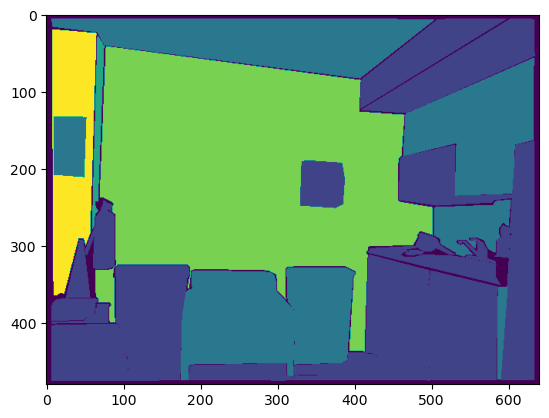

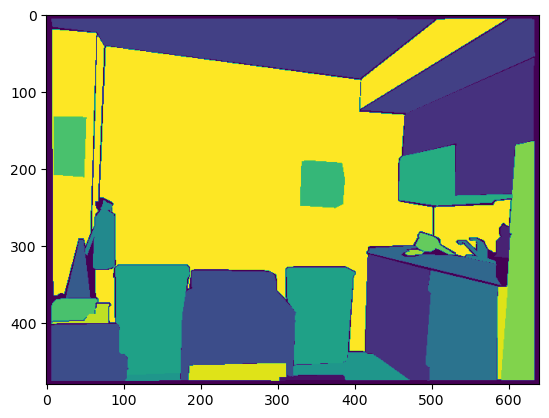

In [17]:
# print the first instance and label to the screen using matplotlib
plt.imshow(instances[0])
plt.show()
plt.imshow(labels[0])
plt.show()

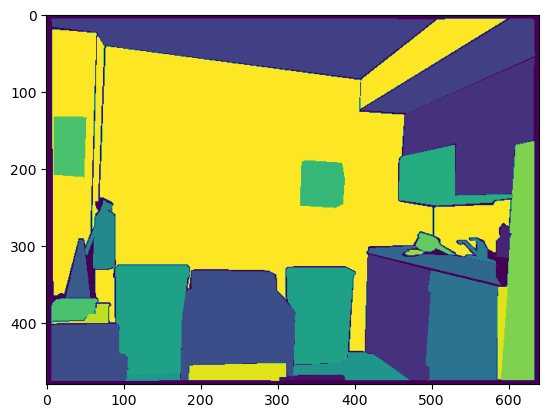

(1449, 480, 640)

In [6]:
# combine the instances and labels into a single array
combined = instances + labels

# plot the first combined image
plt.imshow(combined[0])
plt.show()

combined.shape

In [19]:
true_masks = []
# loop through the number of instances
for i in range(0, len(combined)):
    masks = []
    
    # get list of unique values in this image
    unique = np.unique(combined[i])
    
    # loop through the unique values
    for j in range(1, len(unique)):
        # create a mask which is True where the instance is equal to j
        mask = np.where(combined[i] == unique[j], 255, 0).astype(np.uint8)
        
        # check if the mask is empty
        if mask.sum() == 0:
            continue
        
        # append the mask to true_masks
        masks.append(mask)
    
    # append masks to true_masks
    true_masks.append(masks)

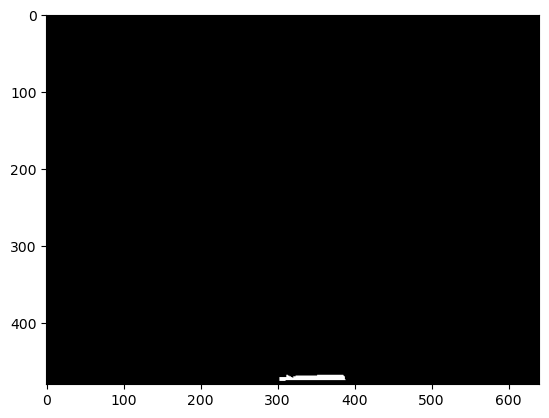

In [22]:
# plot the first true mask
plt.imshow(true_masks[0][0], cmap='gray')
plt.show()

[ 0.    1.01  2.01  3.01  3.02  4.01  4.02  5.01  5.02  6.01  7.01  8.01
  9.01 10.01 11.01 12.01 12.02 13.01 14.01 15.01 15.02 16.01 17.01 18.01
 19.01 20.01 20.02 21.01 21.02 21.03 21.04 21.05]


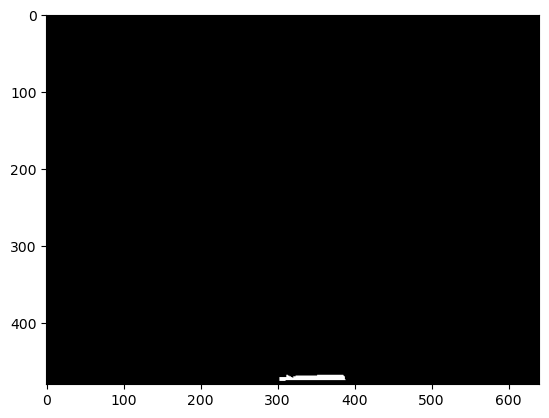

In [21]:
masks = []

# get list of unique values in this image
unique = np.unique(combined[0])
print(unique)

# loop through the unique values, but start at 1 to skip the background
for j in range(1, len(unique)):
    # create a mask which is True where the instance is equal to j
    mask = np.where(combined[0] == unique[j], 255, 0).astype(np.uint8)

    # check if the mask is empty
    if mask.sum() == 0:
        continue
    
    # append the mask to true_masks
    masks.append(mask)

# plot the first mask
plt.imshow(masks[0], cmap='gray')
plt.show()

In [20]:
weighted_ious = []
unweighted_ious = []

for i in range(0, len(true_masks)):
    a = true_masks[i]
    b = image_masks[i]
    
    ious = []
    areas = []
    
    for tm in a:
        area = tm.sum()    
        max_iou = 0
        
        for im in b:
            intersection = np.logical_and(tm, im).sum()
            union = np.logical_or(tm, im).sum()
            iou = intersection / union
            
            if iou > max_iou:
                max_iou = iou
        
        ious.append(max_iou)
        areas.append(area)
    
    ious = np.array(ious)
    areas = np.array(areas)

    weighted_iou = np.sum(np.dot(ious, areas)) / np.sum(areas)
    unweighted_iou = np.mean(ious)
    
    weighted_ious.append(weighted_iou)
    unweighted_ious.append(unweighted_iou)

print('Weighted IOU Average:', np.mean(weighted_ious))
print('Unweighted IOU Average:', np.mean(unweighted_ious))

Weighted IOU Average: 0.15010604751767329
Unweighted IOU Average: 0.06210403661469843
